<a href="https://colab.research.google.com/github/shreeja2513/Stock-forecasting/blob/main/Model_training_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/drive/MyDrive/Stock Index.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2689,2021-04-26,14449.45020,14557.50000,14421.29981,14485.00000,14485.00000,452700.0
2690,2021-04-27,14493.79981,14667.54981,14484.84961,14653.04981,14653.04981,451800.0
2691,2021-04-28,14710.50000,14890.25000,14694.95020,14864.54981,14864.54981,457000.0
2692,2021-04-29,14979.00000,15044.34961,14814.45020,14894.90039,14894.90039,517500.0
2693,2021-04-30,14747.34961,14855.45020,14601.70020,14631.09961,14631.09961,613900.0


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data1=data.reset_index()['Close']

In [ ]:
data1.shape

(2694,)

In [ ]:
import matplotlib.pyplot as plt

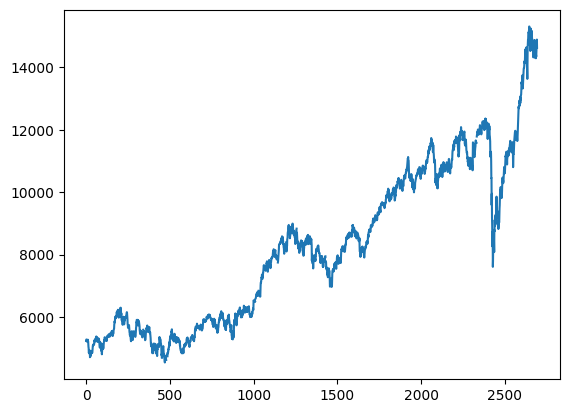

In [ ]:
plt.plot(data1)

In [ ]:
data1

0        5232.200195
1        5277.899902
2        5281.799805
3        5263.100098
4        5244.750000
            ...     
2689    14485.000000
2690    14653.049810
2691    14864.549810
2692    14894.900390
2693    14631.099610
Name: Close, Length: 2694, dtype: float64

In [ ]:
data = data.dropna()

In [ ]:
data1=data1.dropna()
data1

0        5232.200195
1        5277.899902
2        5281.799805
3        5263.100098
4        5244.750000
            ...     
2689    14485.000000
2690    14653.049810
2691    14864.549810
2692    14894.900390
2693    14631.099610
Name: Close, Length: 2667, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [ ]:
print(data1)

[[0.06387819]
 [0.06812123]
 [0.06848332]
 ...
 [0.95820525]
 [0.96102318]
 [0.93653028]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(data1)*0.65)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [ ]:
training_size,test_size

(1733, 934)

In [ ]:
train_data

array([[0.06387819],
       [0.06812123],
       [0.06848332],
       ...,
       [0.46251797],
       [0.4535769 ],
       [0.45343301]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 3
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1729, 3)
(1729,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(930, 3)
(930,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 3, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 3, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
28/28 [==============================] - 8s 62ms/step - loss: 0.0225 - val_loss: 0.0904
Epoch 2/100
28/28 [==============================] - 0s 15ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 3/100
28/28 [==============================] - 0s 14ms/step - loss: 3.0962e-04 - val_loss: 0.0089
Epoch 4/100
28/28 [==============================] - 0s 14ms/step - loss: 1.3117e-04 - val_loss: 0.0093
Epoch 5/100
28/28 [==============================] - 0s 15ms/step - loss: 1.2001e-04 - val_loss: 0.0058
Epoch 6/100
28/28 [==============================] - 0s 14ms/step - loss: 1.1453e-04 - val_loss: 0.0050
Epoch 7/100
28/28 [==============================] - 1s 22ms/step - loss: 1.1286e-04 - val_loss: 0.0037
Epoch 8/100
28/28 [==============================] - 1s 24ms/step - loss: 1.1626e-04 - val_loss: 0.0032
Epoch 9/100
28/28 [==============================] - 1s 22ms/step - loss: 1.0837e-04 - val_loss: 0.0026
Epoch 10/100
28/28 [==============================] - 1s 22ms/step - los

In [ ]:
model.save("lstm_model.h5")

In [ ]:
from google.colab import files
files.download("lstm_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

30/30 [==============================] - 0s 4ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error (MSE):", mse)
import numpy as np

y_pred_direction = np.sign(y_pred[:, 0] - ytest)
directional_accuracy = np.mean(y_pred_direction == np.sign(y_pred[:, 0] - ytest))
print("Directional Accuracy:", directional_accuracy)

30/30 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 0.0012628592505818542
Directional Accuracy: 1.0


In [ ]:
y_train=scaler.inverse_transform([y_train])
ytest=scaler.inverse_transform([ytest])

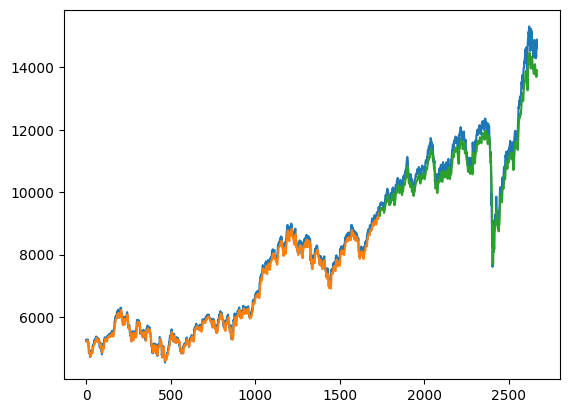

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=3
trainPredictPlot = numpy.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

934

In [ ]:
x_input=test_data[884:].reshape(1,-1)
x_input.shape

(1, 50)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.9868715110780042,
 0.9859430490757428,
 1.0,
 0.9998839422497174,
 0.9901768896568515,
 0.9818253563057309,
 0.9436516048727306,
 0.9691100506155195,
 0.9798198236015878,
 0.9270646850531246,
 0.9486420881348863,
 0.9632699884112763,
 0.993584272785115,
 0.9782786128878518,
 0.9650340662155732,
 0.9667146372189246,
 0.9799173845318616,
 0.9870107803783434,
 0.9736548906858296,
 0.9642356251036464,
 0.9624669235585781,
 0.9449050285757836,
 0.9297292985795789,
 0.9470126549616953,
 0.9463070600499945,
 0.9535815236276954,
 0.9289448206077042,
 0.9081008486569331,
 0.925035941727387,
 0.956399369594541,
 0.9420639710588814,
 0.9584651975495728,
 0.9371523708568998,
 0.941395459848013,
 0.9539807446478898,
 0.9590640741102718,
 0.9554476960422229,
 0.9067916633829483,
 0.9248038262268217,
 0.9319205236841741,
 0.935300070593148,
 0.9113086672339685,
 0.9054547319504878,
 0.915644602425308,
 0.9096280962306169,
 0.9229654891031218,
 0.9385682754103486,
 0.9582052467581799,
 0.9610231827

In [ ]:
recent_data = data1[-time_step:]
next_list = []

for _ in range(2):
   input_data = recent_data[-look_back:].reshape(1, time_step, 1)
   predicted_price = model.predict(input_data)
   next_list.extend([predicted_price[0, 0]])
   recent_data = np.append(recent_data, predicted_price, axis=0)
   print("Next Two Days Predictions:", next_list)

1/1 [==============================] - 0s 25ms/step
Next Two Days Predictions: [0.8872351]
1/1 [==============================] - 0s 26ms/step
Next Two Days Predictions: [0.8872351, 0.8749556]


In [ ]:
predicted_prices = scaler.inverse_transform(np.array(next_list).reshape(-1, 1))

predicted_prices.flatten().tolist()

[14100.166015625, 13967.91015625]

In [ ]:
day_new=np.arange(1,51)
day_pred=np.arange(52,54)

In [ ]:
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
len(data1)

2667

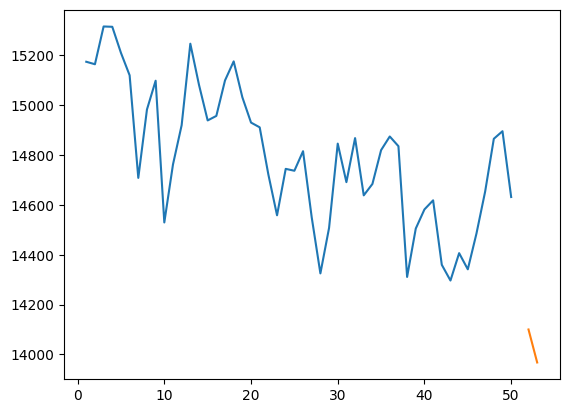

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have defined 'day_new' and 'df1' variables
# and 'day_pred' and 'lst_output' variables from your previous code

# Reshape lst_output to a 2D array with a single column
next_list = np.array(next_list).reshape(-1, 1)

# Inverse transform the data
original_values = scaler.inverse_transform(data1[2617:])
predicted_values = scaler.inverse_transform(next_list)

# Plot the original and predicted values
plt.plot(day_new, original_values)
plt.plot(day_pred, predicted_values)
plt.show()


In [ ]:
# Assuming you have defined 'day_pred' and 'predicted_values' variables from your previous code

# Get the predicted values for the next 2 days
predicted_next_2_days = predicted_values[-2:]
# Print the predicted values
for i, value in enumerate(predicted_next_2_days, 1):
    print("Day {}: {:.2f}".format(i, float(value)))


Day 1: 14100.17
Day 2: 13967.91


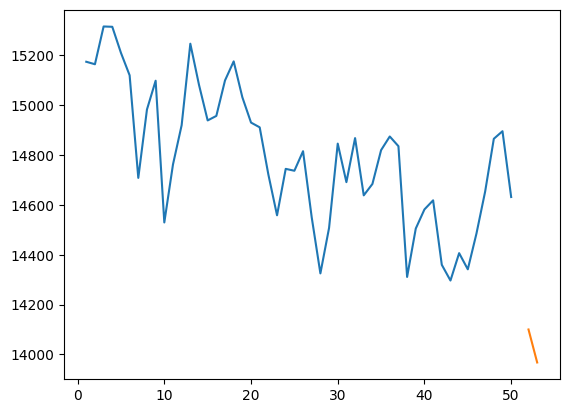

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have defined 'day_new' and 'df1' variables
# and 'day_pred' and 'lst_output' variables from your previous code

if len(next_list) > 0:
    # Reshape lst_output to a 2D array
    next_list = np.array(next_list).reshape(-1, 1)

    # Inverse transform the data
    original_values = scaler.inverse_transform(data1[2617:])
    predicted_values = scaler.inverse_transform(next_list)

    # Plot the original and predicted values
    plt.plot(day_new, original_values)
    plt.plot(day_pred, predicted_values)
    plt.show()
else:
    print("No predictions were made.")


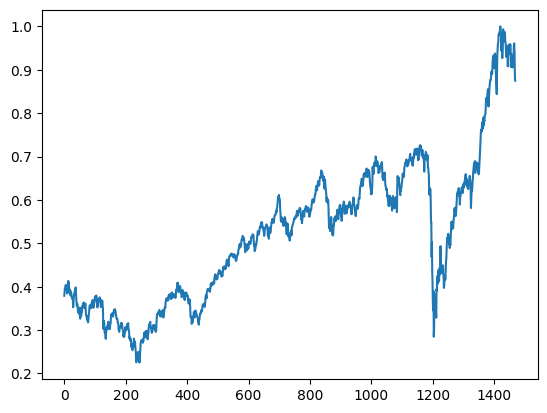

In [ ]:
df3=data1.tolist()
df3.extend(next_list)
plt.plot(df3[1200:])

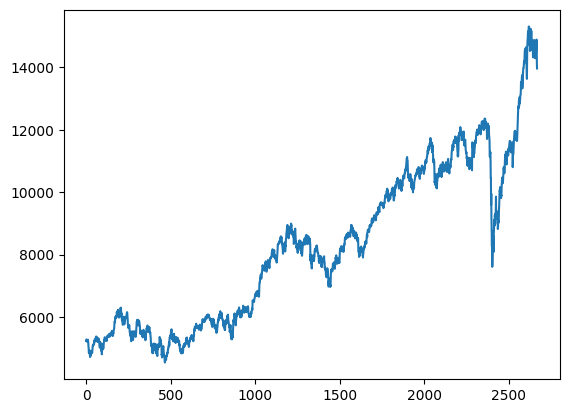

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [ ]:
sample_ds=pd.read_csv('/content/drive/MyDrive/sample_input.csv')


In [ ]:
random.seed(10)

In [ ]:
sample1=sample_ds.dropna()

In [ ]:
sample2=sample1.reset_index()['Close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
reshaped_data = np.array(sample2).reshape(-1, 1)
sample3 = scaler.fit_transform(reshaped_data)

In [ ]:
sample3.shape

(48, 1)

In [ ]:
sample3

array([[0.        ],
       [0.07340949],
       [0.29286999],
       [0.30304186],
       [0.27871588],
       [0.28351388],
       [0.26067556],
       [0.27132723],
       [0.28327398],
       [0.29037494],
       [0.25107955],
       [0.26077162],
       [0.34742341],
       [0.35342092],
       [0.36460018],
       [0.40332018],
       [0.45528249],
       [0.46324746],
       [0.47941637],
       [0.5096438 ],
       [0.49385865],
       [0.4537953 ],
       [0.45446674],
       [0.55153077],
       [0.55172241],
       [0.53243433],
       [0.49097984],
       [0.43551461],
       [0.53540919],
       [0.57211393],
       [0.56990704],
       [0.59432861],
       [0.53862395],
       [0.51799252],
       [0.47385087],
       [0.45576229],
       [0.45422684],
       [0.4585933 ],
       [0.47389866],
       [0.41368369],
       [0.42068906],
       [0.61160143],
       [0.76077162],
       [0.85145393],
       [0.85145393],
       [0.86527209],
       [0.94189634],
       [1.   

In [ ]:
timestep2=3

In [ ]:
prevdata= sample3[-timestep2:]
next_list2= []

for _ in range(2):
   input_data2= np.reshape(prevdata[-timestep2:], (1, timestep2, 1))
   predicted_price = model.predict(input_data2)[0, 0]
   next_list2.append(predicted_price)
   prevdata = np.concatenate((prevdata, [[predicted_price]]), axis=0)

1/1 [==============================] - 0s 25ms/step


In [ ]:
predicted_prices = scaler.inverse_transform(np.array(next_list2).reshape(-1, 1))

predicted_prices.flatten().tolist()

[7110.1796875, 7138.63720703125]